In [12]:
import logging
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# --- SETUP LOGGER FIRST ---
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# --- DATA LOADING ---
def load_data():
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    return pd.DataFrame(data.data, columns=data.feature_names), data.target

# --- MODEL TRAINING ---
def train_model(X, y, model_params, output_path="xgb_model.joblib"):
    try:
        logger.info("Splitting data...")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        logger.info("Initializing XGBoost classifier...")
        model = xgb.XGBClassifier(**model_params)

        logger.info("Training model...")
        model.fit(X_train, y_train)

        logger.info("Evaluating model...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        logger.info(f"Test Accuracy: {accuracy:.4f}")

        logger.info(f"Saving model to {output_path}...")
        joblib.dump(model, output_path)

        return model, accuracy, y_test, y_pred
    except Exception as e:
        logger.exception("Error during training.")
        raise

# --- MAIN SCRIPT ---
if __name__ == "__main__":
    X, y = load_data()

    model_params = {
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3,
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

INFO:__main__:Splitting data...
INFO:__main__:Initializing XGBoost classifier...
INFO:__main__:Training model...
C:\Users\bryan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
INFO:__main__:Evaluating model...
INFO:__main__:Test Accuracy: 0.9561
INFO:__main__:Saving model to xgb_model.joblib...


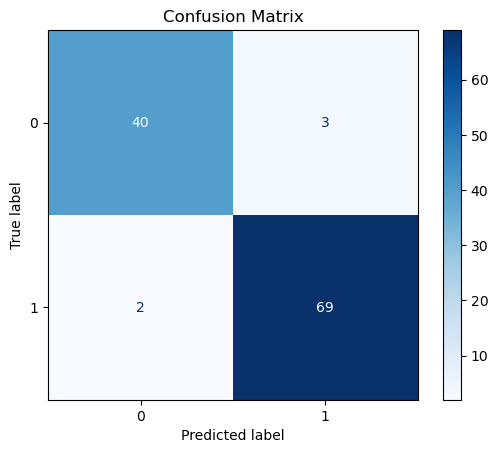

In [13]:
model, acc, y_test, y_pred = train_model(X, y, model_params)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Save expected feature order
feature_names = X.columns.tolist()
with open("feature_names.txt", "w") as f:
    for name in feature_names:
        f.write(f"{name}\n")

In [15]:
import joblib
import pandas as pd

# Load model
model = joblib.load("xgb_model.joblib")

# Load expected feature names
with open("feature_names.txt") as f:
    expected_features = [line.strip() for line in f]

# Sample input — make sure to include all 30 features
sample = {
    'mean radius': [14.0],
    'mean texture': [20.0],
    'mean perimeter': [90.0],
    'mean area': [600.0],
    'mean smoothness': [0.1],
    'mean compactness': [0.2],
    'mean concavity': [0.1],
    'mean concave points': [0.05],
    'mean symmetry': [0.18],
    'mean fractal dimension': [0.06],
    'radius error': [0.5],
    'texture error': [1.0],
    'perimeter error': [2.0],
    'area error': [40.0],
    'smoothness error': [0.005],
    'compactness error': [0.02],
    'concavity error': [0.01],
    'concave points error': [0.01],
    'symmetry error': [0.03],
    'fractal dimension error': [0.005],
    'worst radius': [16.0],
    'worst texture': [30.0],
    'worst perimeter': [110.0],
    'worst area': [800.0],
    'worst smoothness': [0.15],
    'worst compactness': [0.3],
    'worst concavity': [0.2],
    'worst concave points': [0.1],
    'worst symmetry': [0.25],
    'worst fractal dimension': [0.08]
}

# Convert to DataFrame in correct column order
X_new = pd.DataFrame(sample)[expected_features]

# Make prediction
pred = model.predict(X_new)
prob = model.predict_proba(X_new)

print("Predicted class:", pred[0])
print("Probability of class 1:", prob[0][1])


Predicted class: 1
Probability of class 1: 0.9840209
